In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
prot = pd.read_csv('/content/drive/MyDrive/protein_set_15-45.csv')
prot = prot.drop(prot.columns[[0]], axis=1)

In [4]:
zerlistPL = [2, 4, 0, 22, 30, 1, 3, 5, 7, 15, 17, 18, 25, 26, 31, 34, 35]
zerlist3D = [10, 11, 12, 13, 14, 19, 20, 21, 23, 29]
zerLetters = [33]
zerInd1 = [9]
zerInd2 = [24]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dist = {}
for x in range(781):
  belok = pickle.load(open('/content/drive/MyDrive/pkl/780_15_45'+ str(x) +'.pkl', 'rb'))
  pow = []
  for i in range(len(belok)):
    if i in zerlistPL:
      zer = np.zeros(len(belok[i][1][0]))
      differ = 45 - len(belok[i][1])
      zer = np.repeat(zer,differ)
      a = np.append(belok[i][1], zer)
      a = a.reshape(45,len(belok[i][1][0]))
    if i in zerlist3D:
      zer = np.zeros(len(belok[i][1][0]))
      differ = 45 - len(belok[i][1])
      zer = np.repeat(zer,differ)
      a = np.append(belok[i][1], zer)
      a = a.reshape(45,len(belok[i][1][0]),1)
    if i in zerLetters:
      differ = 45 - len(belok[i][1][0])
      for j in range(differ):
        belok[i][1][0] = belok[i][1][0] + str(0)
    # if i in zerInd1:
    #   zer = np.zeros(len(belok[i][1]))
    #   differ = 45 - len(belok[i][1][0])
    #   zer = np.repeat(zer,differ)
    #   a = np.append(belok[i][1], zer)
    #   a = a.reshape(45,len(belok[i][1]),1)
    if i in zerInd2:
      zer = np.zeros(len(belok[i][1][0][0]))
      differ = 45 - len(belok[i][1][0])
      zer = np.repeat(zer,differ)
      a = np.append(belok[i][1][0], zer)
      a = a.reshape(45,len(belok[i][1][0][0]))

    if (i == 0):
      pow = a

    if (i == 1):
      pow = np.concatenate((pow.T,a.T), axis = 0)

    # if (i in zerInd1):
    #   a = a.reshape(45,len(belok[i][1][0]))
    #   pow = np.concatenate((pow,a.T), axis = 0)

    if (i in zerlist3D) and (i != 10) and (i != 13) and (i != 23):
      a = a.reshape(45,len(belok[i][1][0]))
      pow = np.concatenate((pow,a.T), axis = 0)


    if (i in zerlistPL) and (i != 0):
      pow = np.concatenate((pow,a.T), axis = 0)
  
  dist[prot['pdb_name'][x]] = pow.T

In [ ]:
with open('/content/drive/MyDrive/prot_feat.pkl', 'wb') as handle:
    pickle.dump(dist, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
plow = []
for x in range(781):
  belok = pickle.load(open('/content/drive/MyDrive/pkl/780_15_45'+ str(x) +'.pkl', 'rb'))  
  for i in range(len(belok)):
    if i in zerlistPL:
      zer = np.zeros(len(belok[i][1][0]))
      differ = 45 - len(belok[i][1])
      zer = np.repeat(zer,differ)
     
    if i in zerlist3D:
      zer = np.zeros(len(belok[i][1][0]))
      differ = 45 - len(belok[i][1])
      zer = np.repeat(zer,differ)

    if i in zerLetters:
      differ = 45 - len(belok[i][1][0])

      for j in range(differ):
        belok[i][1][0] = belok[i][1][0] + str(0)
    if i in zerInd1:
      zer = np.zeros(len(belok[i][1]))
      differ = 45 - len(belok[i][1][0])

    if i in zerInd2:
      zer = np.zeros(len(belok[i][1][0][0]))
      differ = 45 - len(belok[i][1][0])
  plow.append(45-differ)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Соотношение')

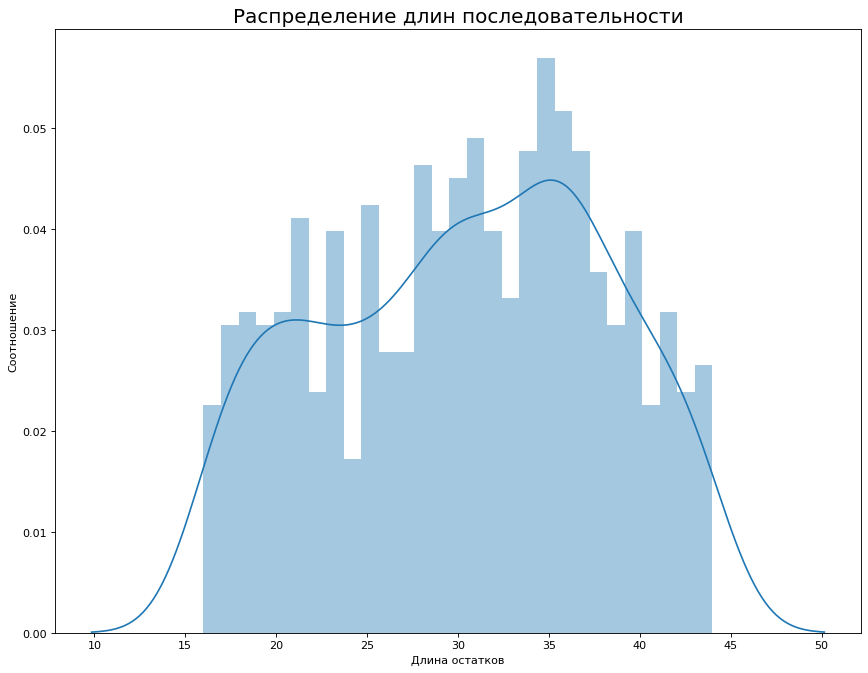

In [42]:
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(plow, bins= 29)
plt.title('Распределение длин последовательности', fontsize=18)
plt.xlabel('Длина остатков')
plt.ylabel('Соотношение')